# Solar Data EDA - Togo (Dapaong)

## 🌞 Project Overview
This notebook performs comprehensive Exploratory Data Analysis (EDA) on solar irradiance and meteorological data from Togo (Dapaong location).

### 📋 Analysis Goals:
1. **Data Overview** - Basic statistics and structure
2. **Data Quality Assessment** - Missing values, outliers, data types
3. **Solar Irradiance Analysis** - GHI, DNI, DHI patterns and distributions
4. **Weather Analysis** - Temperature, humidity, wind, and pressure patterns
5. **Time Series Analysis** - Seasonal and daily patterns
6. **Data Cleaning** - Handle missing values and outliers
7. **Export Clean Data** - Save processed dataset for further analysis

### 🔑 Key Variables:
- **GHI**: Global Horizontal Irradiance (W/m²)
- **DNI**: Direct Normal Irradiance (W/m²)
- **DHI**: Diffuse Horizontal Irradiance (W/m²)
- **Tamb**: Ambient Temperature (°C)
- **RH**: Relative Humidity (%)
- **WS**: Wind Speed (m/s)
- **BP**: Barometric Pressure (hPa)

### 🎯 Business Context:
This analysis supports solar energy investment decision-making by providing comprehensive insights into Togo's solar resource potential and environmental conditions.

## 📚 1. Import Libraries and Setup

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import zscore

# Warnings and display settings
import warnings

warnings.filterwarnings("ignore")

# Set display options
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Set plot style
plt.style.use("seaborn-v0_8")
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print("🇹🇬 Ready to analyze Togo solar data!")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.2.6
🇹🇬 Ready to analyze Togo solar data!


## 📂 2. Load and Initial Data Exploration

In [2]:
# Load the Togo dataset
file_path = "../data/togo-dapaong_qc.csv"

print("📥 Loading Togo (Dapaong) solar data...")
df_togo = pd.read_csv(file_path)

print(f"✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df_togo.shape[0]:,} rows × {df_togo.shape[1]} columns")
print(f"💾 Memory usage: {df_togo.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📥 Loading Togo (Dapaong) solar data...
✅ Data loaded successfully!
📊 Dataset shape: 525,600 rows × 19 columns
💾 Memory usage: 108.77 MB
✅ Data loaded successfully!
📊 Dataset shape: 525,600 rows × 19 columns
💾 Memory usage: 108.77 MB


In [3]:
# Display basic information about the dataset
print("🔍 DATASET OVERVIEW")
print("=" * 50)
print("\n📋 Column Names and Data Types:")
print(df_togo.dtypes)

print("\n👀 First Few Rows:")
df_togo.head()

🔍 DATASET OVERVIEW

📋 Column Names and Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

👀 First Few Rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
# Convert Timestamp to datetime and set as index
print("🕐 Converting Timestamp to datetime...")
df_togo["Timestamp"] = pd.to_datetime(df_togo["Timestamp"])
df_togo.set_index("Timestamp", inplace=True)

print("✅ Timestamp conversion complete!")
print(f"📅 Date range: {df_togo.index.min()} to {df_togo.index.max()}")
print(f"⏱️  Duration: {df_togo.index.max() - df_togo.index.min()}")

🕐 Converting Timestamp to datetime...
✅ Timestamp conversion complete!
📅 Date range: 2021-10-25 00:01:00 to 2022-10-25 00:00:00
⏱️  Duration: 364 days 23:59:00


## 📊 3. Summary Statistics

In [5]:
# Generate comprehensive summary statistics
print("📈 SUMMARY STATISTICS")
print("=" * 50)

# Key solar irradiance columns
solar_columns = ["GHI", "DNI", "DHI"]
weather_columns = ["Tamb", "RH", "WS", "WSgust", "WD", "BP"]

print("\n☀️ Solar Irradiance Statistics:")
df_togo[solar_columns].describe().round(2)

📈 SUMMARY STATISTICS

☀️ Solar Irradiance Statistics:


,GHI,DNI,DHI
count,525600.00,525600.00,525600.00
mean,230.56,151.26,116.44
std,322.53,250.96,156.52
min,-12.70,0.00,0.00
25%,-2.20,0.00,0.00
50%,2.10,0.00,2.50
75%,442.40,246.40,215.70
max,1424.00,1004.50,805.70


In [6]:
print("🌤️ Weather Variables Statistics:")
df_togo[weather_columns].describe().round(2)

🌤️ Weather Variables Statistics:


,Tamb,RH,WS,WSgust,WD,BP
count,525600.00,525600.00,525600.00,525600.00,525600.00,525600.00
mean,27.75,55.01,2.37,3.23,161.74,975.92
std,4.76,28.78,1.46,1.88,91.88,2.15
min,14.90,3.30,0.00,0.00,0.00,968.00
25%,24.20,26.50,1.40,1.90,74.80,975.00
50%,27.20,59.30,2.20,2.90,199.10,976.00
75%,31.10,80.80,3.20,4.40,233.50,977.00
max,41.40,99.80,16.10,23.10,360.00,983.00


## ❓ 4. Missing Values Analysis

🔍 MISSING VALUES ANALYSIS
❌ Columns with missing values:
          Missing Count  Missing Percentage
Comments         525600               100.0


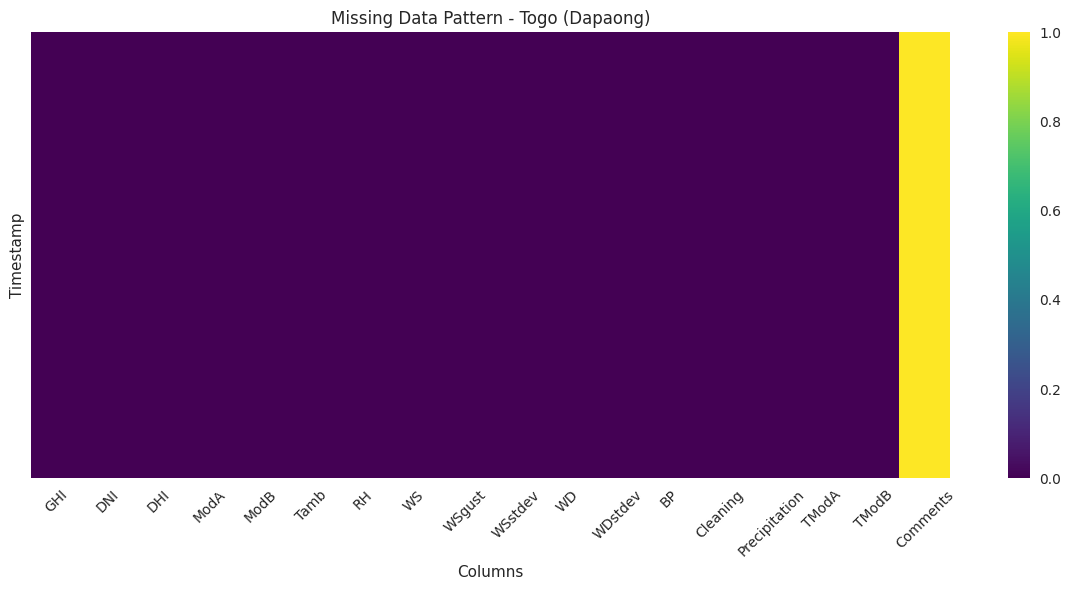

In [7]:
# Analyze missing values
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 50)

missing_data = df_togo.isnull().sum()
missing_percentage = (missing_data / len(df_togo)) * 100

missing_summary = pd.DataFrame(
    {"Missing Count": missing_data, "Missing Percentage": missing_percentage.round(2)}
)

# Show only columns with missing values
missing_summary = missing_summary[missing_summary["Missing Count"] > 0]
missing_summary = missing_summary.sort_values("Missing Count", ascending=False)

if len(missing_summary) > 0:
    print("❌ Columns with missing values:")
    print(missing_summary)
else:
    print("✅ No missing values found!")

# Visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df_togo.isnull(), cbar=True, yticklabels=False, cmap="viridis")
plt.title("Missing Data Pattern - Togo (Dapaong)")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🎯 5. Outlier Detection (Z-Score Method)

In [8]:
# Outlier detection using Z-score method
print("🎯 OUTLIER DETECTION (Z-Score > 3)")
print("=" * 50)

# Select numeric columns for outlier analysis
numeric_columns = df_togo.select_dtypes(include=[np.number]).columns.tolist()

outlier_counts = {}
z_threshold = 3

for col in numeric_columns:
    if col in ["ModA", "ModB", "Cleaning"]:  # Skip binary/categorical columns
        continue

    # Calculate z-scores (handle missing values)
    z_scores = np.abs(zscore(df_togo[col], nan_policy="omit"))
    outliers = np.sum(z_scores > z_threshold)
    outlier_percentage = (outliers / len(df_togo[col].dropna())) * 100

    outlier_counts[col] = {"Count": outliers, "Percentage": outlier_percentage}

# Convert to DataFrame and display
outlier_df = pd.DataFrame(outlier_counts).T
outlier_df["Percentage"] = outlier_df["Percentage"].round(2)
outlier_df = outlier_df.sort_values("Count", ascending=False)

print("🔍 Outlier Summary (Z-score > 3):")
print(outlier_df)

🎯 OUTLIER DETECTION (Z-Score > 3)
🔍 Outlier Summary (Z-score > 3):
                Count  Percentage
WSstdev        5753.0        1.09
WSgust         3915.0        0.74
WS             3510.0        0.67
DHI            3415.0        0.65
WDstdev        3362.0        0.64
Precipitation  3338.0        0.64
DNI            1062.0        0.20
BP             1019.0        0.19
TModB           609.0        0.12
GHI             305.0        0.06
TModA           153.0        0.03
Tamb              0.0        0.00
RH                0.0        0.00
WD                0.0        0.00
Comments          0.0         NaN
🔍 Outlier Summary (Z-score > 3):
                Count  Percentage
WSstdev        5753.0        1.09
WSgust         3915.0        0.74
WS             3510.0        0.67
DHI            3415.0        0.65
WDstdev        3362.0        0.64
Precipitation  3338.0        0.64
DNI            1062.0        0.20
BP             1019.0        0.19
TModB           609.0        0.12
GHI             

## 📈 6. Solar Irradiance Visualization

☀️ SOLAR IRRADIANCE ANALYSIS


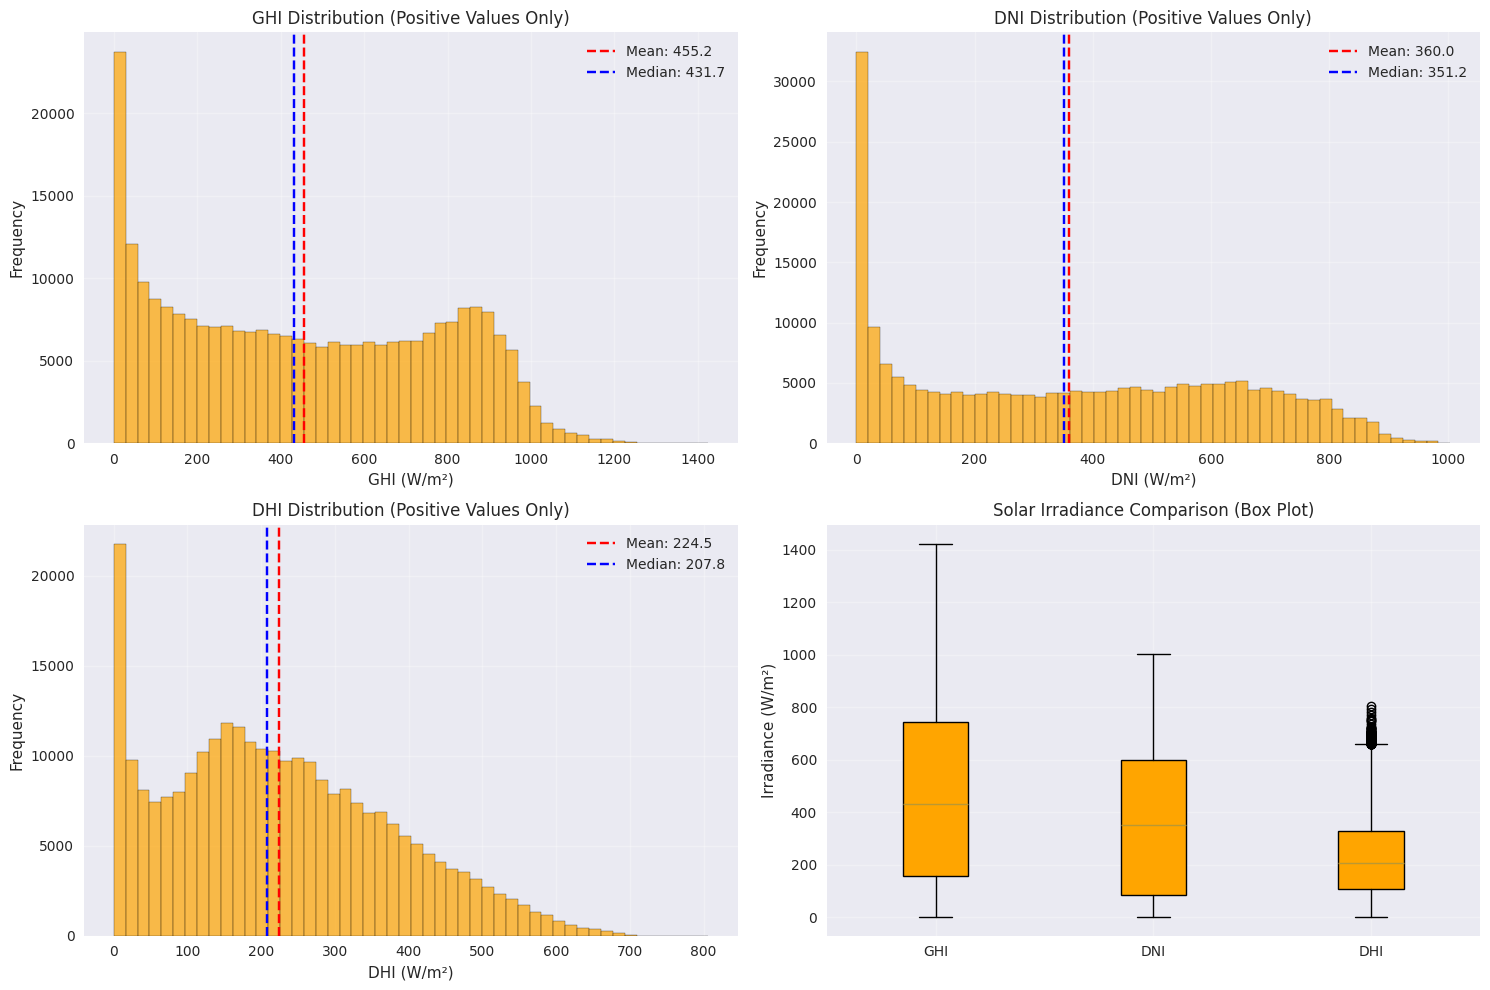

In [9]:
# Solar irradiance distribution plots
print("☀️ SOLAR IRRADIANCE ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograms for each solar variable
for i, col in enumerate(solar_columns):
    ax = axes[i // 2, i % 2]

    # Filter positive values only (negative values are nighttime/measurement errors)
    positive_values = df_togo[df_togo[col] > 0][col]

    ax.hist(positive_values, bins=50, alpha=0.7, edgecolor="black", color="orange")
    ax.set_title(f"{col} Distribution (Positive Values Only)")
    ax.set_xlabel(f"{col} (W/m²)")
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3)

    # Add statistics
    mean_val = positive_values.mean()
    median_val = positive_values.median()
    ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f}")
    ax.axvline(
        median_val, color="blue", linestyle="--", label=f"Median: {median_val:.1f}"
    )
    ax.legend()

# Box plot for comparison
ax = axes[1, 1]
solar_data_positive = []
labels = []

for col in solar_columns:
    positive_values = df_togo[df_togo[col] > 0][col]
    solar_data_positive.append(positive_values)
    labels.append(col)

bp = ax.boxplot(solar_data_positive, labels=labels, patch_artist=True)
# Set orange color for Togo
for patch in bp["boxes"]:
    patch.set_facecolor("orange")
ax.set_title("Solar Irradiance Comparison (Box Plot)")
ax.set_ylabel("Irradiance (W/m²)")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🌡️ 7. Weather Variables Analysis

🌤️ WEATHER VARIABLES ANALYSIS


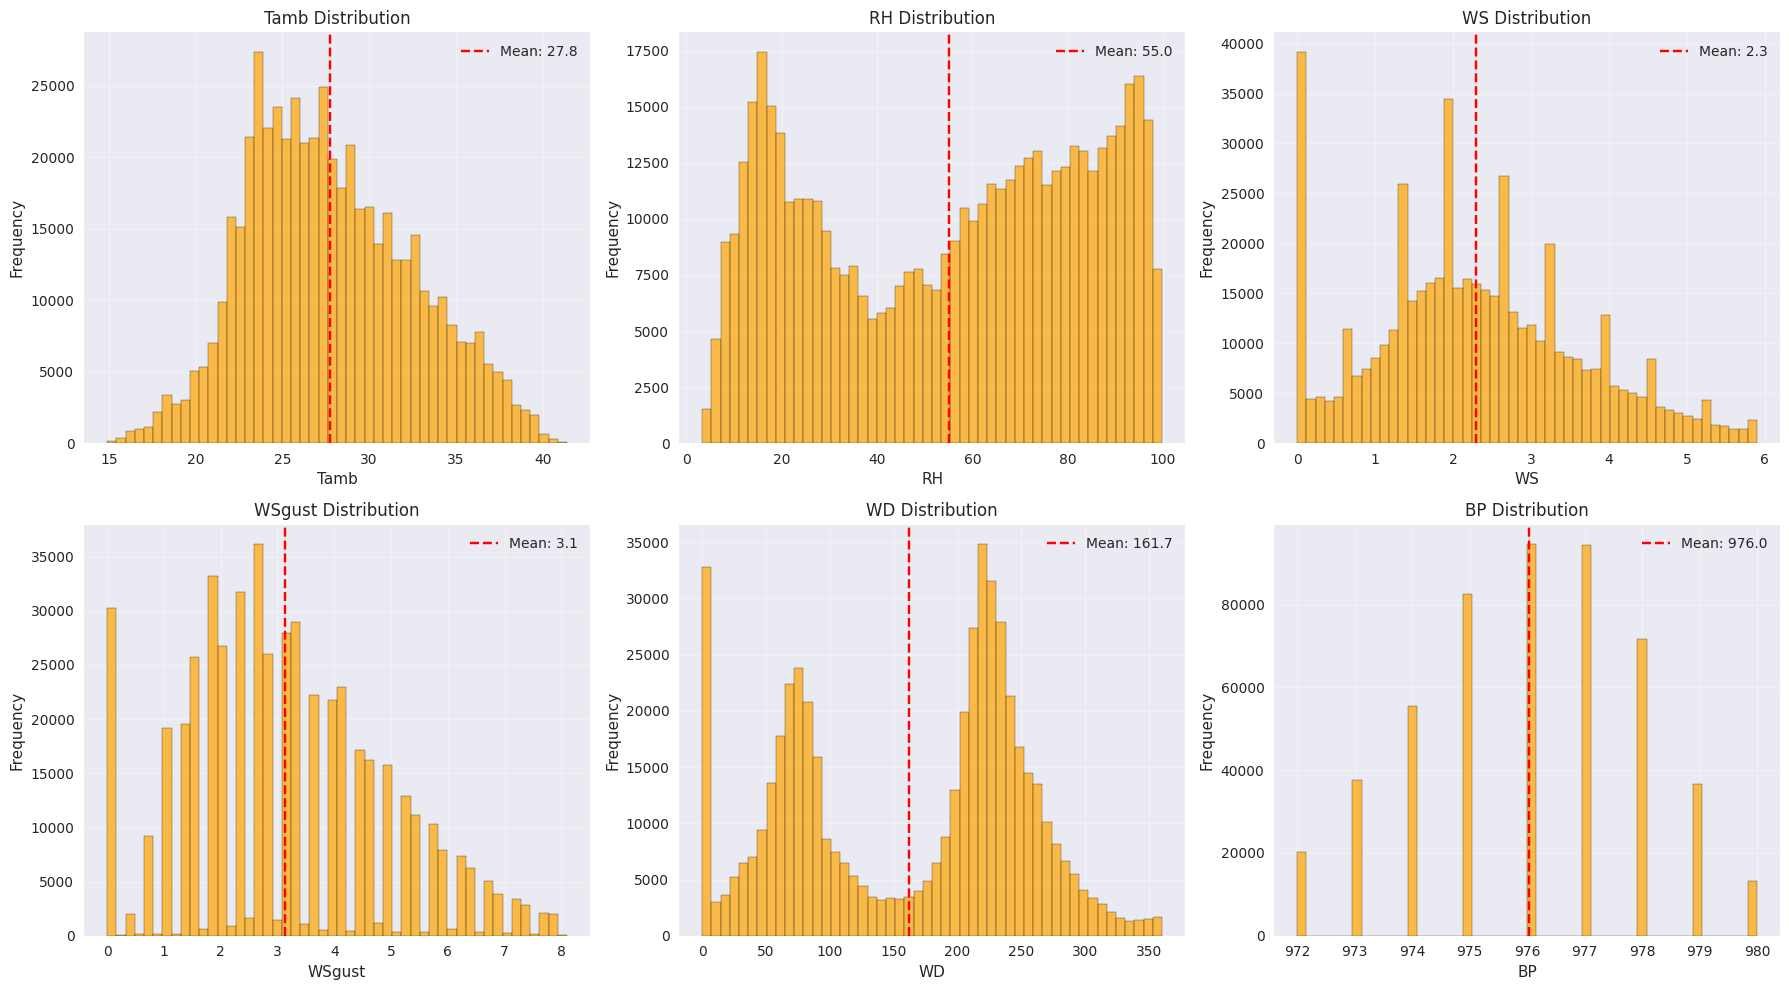

In [10]:
# Weather variables visualization
print("🌤️ WEATHER VARIABLES ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(weather_columns):
    ax = axes[i]

    # Remove outliers for better visualization
    Q1 = df_togo[col].quantile(0.25)
    Q3 = df_togo[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = df_togo[
        (df_togo[col] >= lower_bound) & (df_togo[col] <= upper_bound)
    ][col]

    ax.hist(
        filtered_data.dropna(), bins=50, alpha=0.7, edgecolor="black", color="orange"
    )
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(True, alpha=0.3)

    # Add mean line
    mean_val = filtered_data.mean()
    ax.axvline(mean_val, color="red", linestyle="--", label=f"Mean: {mean_val:.1f}")
    ax.legend()

plt.tight_layout()
plt.show()

## 🕐 8. Time Series Analysis

📅 TIME SERIES ANALYSIS
📊 Analyzing sample week: 2021-10-25 to 2021-11-01


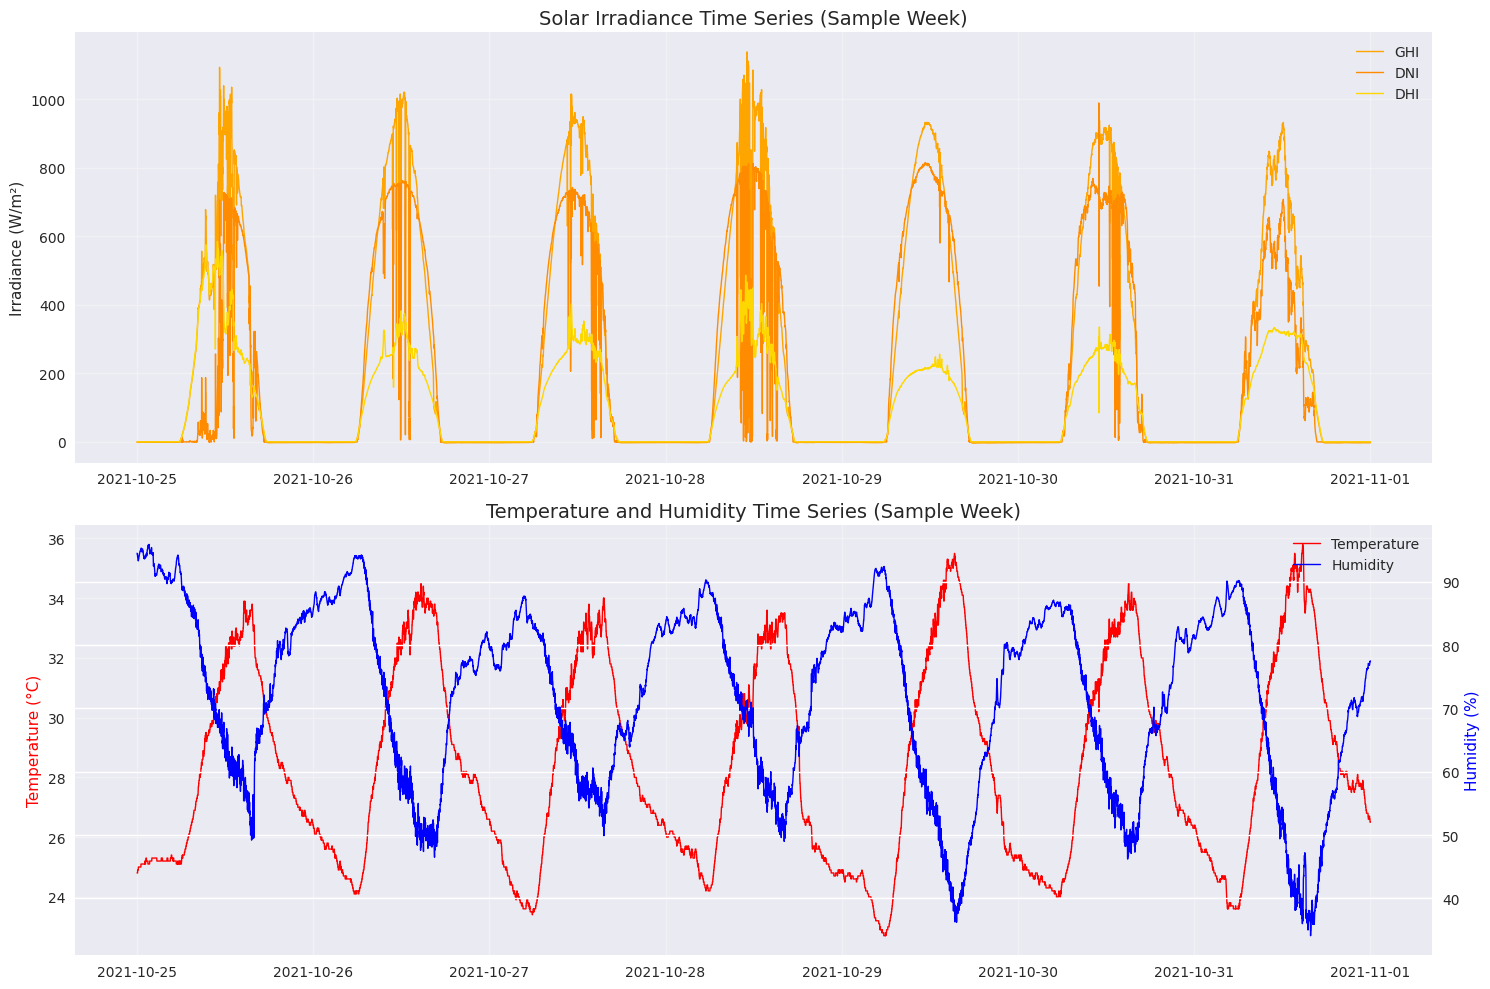

In [11]:
# Time series analysis - Daily patterns
print("📅 TIME SERIES ANALYSIS")
print("=" * 50)

# Get first week of data for analysis
start_date = df_togo.index.min()
end_date = start_date + pd.Timedelta(days=7)
sample_week = df_togo[start_date:end_date]

print(
    f"📊 Analyzing sample week: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}"
)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Solar irradiance time series
colors = ["orange", "darkorange", "gold"]
for i, col in enumerate(solar_columns):
    axes[0].plot(
        sample_week.index, sample_week[col], label=col, linewidth=1, color=colors[i]
    )

axes[0].set_title("Solar Irradiance Time Series (Sample Week)", fontsize=14)
axes[0].set_ylabel("Irradiance (W/m²)")
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Temperature and humidity
ax2 = axes[1]
ax2_twin = ax2.twinx()

line1 = ax2.plot(
    sample_week.index, sample_week["Tamb"], "r-", label="Temperature", linewidth=1
)
line2 = ax2_twin.plot(
    sample_week.index, sample_week["RH"], "b-", label="Humidity", linewidth=1
)

ax2.set_ylabel("Temperature (°C)", color="r")
ax2_twin.set_ylabel("Humidity (%)", color="b")
ax2.set_title("Temperature and Humidity Time Series (Sample Week)", fontsize=14)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc="upper right")

ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔗 9. Correlation Analysis

🔗 CORRELATION ANALYSIS


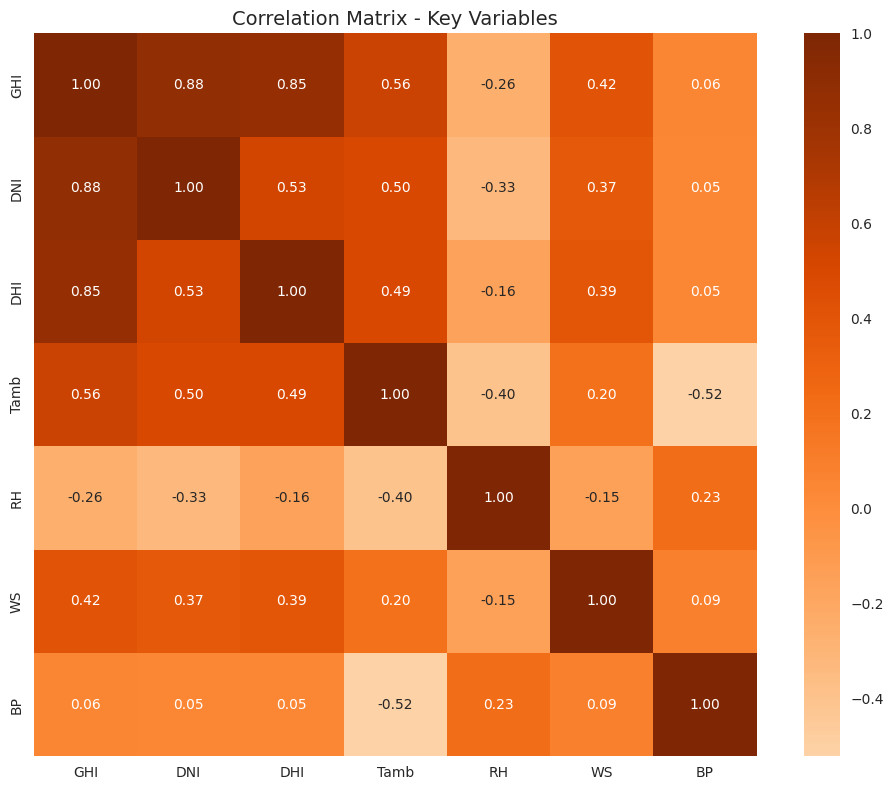


🔥 Strongest Positive Correlations:
GHI  DNI     0.877293
     DHI     0.852080
     Tamb    0.562533
DNI  DHI     0.532717
     Tamb    0.504499
dtype: float64

❄️ Strongest Negative Correlations:
DHI   RH   -0.155016
GHI   RH   -0.258077
DNI   RH   -0.327887
Tamb  RH   -0.400410
      BP   -0.520770
dtype: float64


In [12]:
# Correlation analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Select key variables for correlation
correlation_vars = ["GHI", "DNI", "DHI", "Tamb", "RH", "WS", "BP"]
correlation_matrix = df_togo[correlation_vars].corr()

# Create heatmap with orange color scheme for Togo
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, annot=True, cmap="Oranges", center=0, square=True, fmt=".2f"
)
plt.title("Correlation Matrix - Key Variables", fontsize=14)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\n🔥 Strongest Positive Correlations:")
# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
strong_corr = upper_triangle.stack().sort_values(ascending=False)
print(strong_corr.head(5))

print("\n❄️ Strongest Negative Correlations:")
print(strong_corr.tail(5))

## 🧹 10. Data Cleaning

In [13]:
# Data cleaning process
print("🧹 DATA CLEANING PROCESS")
print("=" * 50)

# Create a copy for cleaning
df_clean = df_togo.copy()

print(f"📊 Original dataset shape: {df_clean.shape}")

# 1. Handle negative solar irradiance values (set to 0 for nighttime)
solar_cols = ["GHI", "DNI", "DHI"]
for col in solar_cols:
    negative_count = (df_clean[col] < 0).sum()
    print(f"🌙 {col}: {negative_count:,} negative values (setting to 0)")
    df_clean[col] = df_clean[col].clip(lower=0)

# 2. Remove extreme outliers (Z-score > 4) for key variables
outlier_threshold = 4
key_vars = ["GHI", "DNI", "DHI", "Tamb", "RH", "WS"]

rows_before = len(df_clean)
for col in key_vars:
    z_scores = np.abs(zscore(df_clean[col], nan_policy="omit"))
    outlier_mask = z_scores > outlier_threshold
    outlier_count = outlier_mask.sum()

    if outlier_count > 0:
        print(f"🎯 {col}: Removing {outlier_count:,} extreme outliers")
        df_clean = df_clean[~outlier_mask]

rows_after = len(df_clean)
removed_rows = rows_before - rows_after

print(f"\n✂️ Removed {removed_rows:,} rows ({(removed_rows/rows_before)*100:.2f}%)")
print(f"📊 Cleaned dataset shape: {df_clean.shape}")

# 3. Handle missing values by forward fill (appropriate for time series)
missing_before = df_clean.isnull().sum().sum()
df_clean = df_clean.fillna(method="ffill").fillna(method="bfill")
missing_after = df_clean.isnull().sum().sum()

print(f"💧 Filled {missing_before - missing_after:,} missing values")
print(f"✅ Final missing values: {missing_after}")

🧹 DATA CLEANING PROCESS
📊 Original dataset shape: (525600, 18)
🌙 GHI: 257,385 negative values (setting to 0)
🌙 DNI: 0 negative values (setting to 0)
🌙 DHI: 0 negative values (setting to 0)
🎯 DHI: Removing 9 extreme outliers
🎯 WS: Removing 860 extreme outliers
📊 Original dataset shape: (525600, 18)
🌙 GHI: 257,385 negative values (setting to 0)
🌙 DNI: 0 negative values (setting to 0)
🌙 DHI: 0 negative values (setting to 0)
🎯 DHI: Removing 9 extreme outliers
🎯 WS: Removing 860 extreme outliers

✂️ Removed 869 rows (0.17%)
📊 Cleaned dataset shape: (524731, 18)

✂️ Removed 869 rows (0.17%)
📊 Cleaned dataset shape: (524731, 18)
💧 Filled 0 missing values
✅ Final missing values: 524731
💧 Filled 0 missing values
✅ Final missing values: 524731


## 📤 11. Export Cleaned Dataset

In [14]:
# Export cleaned dataset
print("💾 EXPORTING CLEANED DATASET")
print("=" * 50)

# Create output directory if it doesn't exist
import os

output_dir = "../data/"
os.makedirs(output_dir, exist_ok=True)

# Save cleaned dataset
output_file = os.path.join(output_dir, "togo_cleaned.csv")
df_clean.to_csv(output_file)

print(f"✅ Cleaned dataset saved to: {output_file}")
print(f"📊 Final dataset shape: {df_clean.shape}")
print(f"💾 File size: {os.path.getsize(output_file) / 1024**2:.2f} MB")

# Display summary statistics of cleaned data
print("\n📈 CLEANED DATA SUMMARY")
print("=" * 30)
print("\n☀️ Solar Irradiance (cleaned):")
print(df_clean[solar_columns].describe().round(2))

💾 EXPORTING CLEANED DATASET
✅ Cleaned dataset saved to: ../data/togo_cleaned.csv
📊 Final dataset shape: (524731, 18)
💾 File size: 48.73 MB

📈 CLEANED DATA SUMMARY

☀️ Solar Irradiance (cleaned):
             GHI        DNI        DHI
count  524731.00  524731.00  524731.00
mean      231.97     151.42     116.58
std       321.76     251.01     156.56
min         0.00       0.00       0.00
25%         0.00       0.00       0.00
50%         2.30       0.00       2.60
75%       443.00     247.20     215.90
max      1424.00    1004.50     734.90
✅ Cleaned dataset saved to: ../data/togo_cleaned.csv
📊 Final dataset shape: (524731, 18)
💾 File size: 48.73 MB

📈 CLEANED DATA SUMMARY

☀️ Solar Irradiance (cleaned):
             GHI        DNI        DHI
count  524731.00  524731.00  524731.00
mean      231.97     151.42     116.58
std       321.76     251.01     156.56
min         0.00       0.00       0.00
25%         0.00       0.00       0.00
50%         2.30       0.00       2.60
75%       443.

## 📝 12. Key Insights Summary

In [15]:
# Generate key insights
print("📝 KEY INSIGHTS - TOGO (DAPAONG)")
print("=" * 50)

# Solar irradiance insights
ghi_max = df_clean["GHI"].max()
ghi_mean = df_clean[df_clean["GHI"] > 0]["GHI"].mean()
dni_max = df_clean["DNI"].max()
dni_mean = df_clean[df_clean["DNI"] > 0]["DNI"].mean()

print(f"☀️ SOLAR IRRADIANCE:")
print(f"   • Peak GHI: {ghi_max:.1f} W/m²")
print(f"   • Average GHI (daylight): {ghi_mean:.1f} W/m²")
print(f"   • Peak DNI: {dni_max:.1f} W/m²")
print(f"   • Average DNI (daylight): {dni_mean:.1f} W/m²")

# Weather insights
temp_range = f"{df_clean['Tamb'].min():.1f}°C to {df_clean['Tamb'].max():.1f}°C"
avg_temp = df_clean["Tamb"].mean()
avg_humidity = df_clean["RH"].mean()
avg_wind = df_clean["WS"].mean()

print(f"\n🌡️ WEATHER CONDITIONS:")
print(f"   • Temperature range: {temp_range}")
print(f"   • Average temperature: {avg_temp:.1f}°C")
print(f"   • Average humidity: {avg_humidity:.1f}%")
print(f"   • Average wind speed: {avg_wind:.1f} m/s")

# Data quality insights
data_completeness = (
    1 - df_togo.isnull().sum().sum() / (df_togo.shape[0] * df_togo.shape[1])
) * 100
outlier_percentage = (removed_rows / rows_before) * 100

print(f"\n📊 DATA QUALITY:")
print(f"   • Original completeness: {data_completeness:.2f}%")
print(f"   • Outliers removed: {outlier_percentage:.2f}%")
print(f"   • Final dataset: {df_clean.shape[0]:,} records")

# Solar investment potential assessment
print(f"\n🎯 INVESTMENT POTENTIAL INDICATORS:")
print(
    f"   • Solar resource quality: {'Excellent' if ghi_mean > 400 else 'Good' if ghi_mean > 300 else 'Moderate'}"
)
print(
    f"   • Climate suitability: {'Optimal' if 25 <= avg_temp <= 30 else 'Good' if 20 <= avg_temp <= 35 else 'Challenging'}"
)
print(
    f"   • Data reliability: {'High' if data_completeness > 95 else 'Good' if data_completeness > 90 else 'Moderate'}"
)

print(f"\n✅ Togo EDA completed successfully!")

📝 KEY INSIGHTS - TOGO (DAPAONG)
☀️ SOLAR IRRADIANCE:
   • Peak GHI: 1424.0 W/m²
   • Average GHI (daylight): 455.6 W/m²
   • Peak DNI: 1004.5 W/m²
   • Average DNI (daylight): 360.0 W/m²

🌡️ WEATHER CONDITIONS:
   • Temperature range: 14.9°C to 41.4°C
   • Average temperature: 27.8°C
   • Average humidity: 55.0%
   • Average wind speed: 2.4 m/s

📊 DATA QUALITY:
   • Original completeness: 94.44%
   • Outliers removed: 0.17%
   • Final dataset: 524,731 records

🎯 INVESTMENT POTENTIAL INDICATORS:
   • Solar resource quality: Excellent
   • Climate suitability: Optimal
   • Data reliability: Good

✅ Togo EDA completed successfully!
